In [ ]:
import numpy as np, torch, dill, time, os
from Ctubes.curve_parametrizations import torus_knot_parameterization_maekawa_scholz
from Ctubes.geometry_utils import rotate_about_axis, regular_polygon, get_bisecting_plane_normals_with_symmetry
from Ctubes.plot_utils import plot_generatrix
from Ctubes.tubes import Directrix, Generatrix, CTube
from Ctubes.target_cross_sections import fix_end_cross_sections 
from Ctubes.opt import CTubeOptimizationProblem
from Ctubes.misc_utils import get_pairings_all
from Ctubes.path_utils import get_name, setup_paths

paths = setup_paths(get_name())

PI = np.pi
TORCH_DTYPE = torch.float64
torch.set_default_dtype(TORCH_DTYPE)
torch.set_printoptions(precision=4)

%load_ext autoreload
%autoreload 2

%matplotlib widget

# Figure 12: 7-fold Torus Unknot

## #1: Original 7-fold Unknot from [Maekawa and Scholz 2024] – Ratio 0.205

In [3]:
# Define a path to output specific to the current test case
paths = setup_paths(get_name(), test_name="fig12_7fold_torus_ms_ratio205")

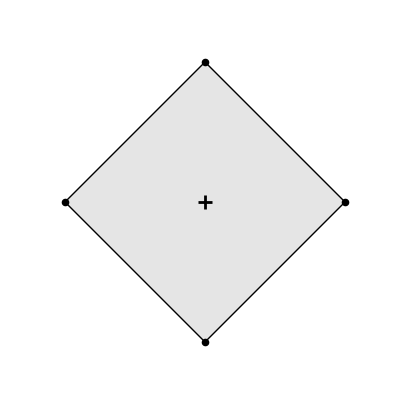

In [4]:
# Generatrix: regular N-gon
N = 4
tube_radius = 0.3
generatrix_2d = regular_polygon(N, tube_radius)

fig, ax = plot_generatrix(generatrix_2d)

In [5]:
# Directrix: torus knot parametrization from [Maekawa & Scholz 2024]
ratio = 0.205

closed_curve = True
K_per_lobe = 11
n_fold_symm = 7
K = K_per_lobe * n_fold_symm + 1
K_to_M_factor = 6
M = K_to_M_factor * (K - 1) + 1

R = 3
r = ratio * R
ts_disc_curve = torch.linspace(0.0, 2.0 * PI, K)
cps_ref = torus_knot_parameterization_maekawa_scholz(ts_disc_curve, p=1, q=n_fold_symm, r=r, R=R)

In [6]:
# Define symmetry transform
z_axis = torch.tensor([0.0, 0.0, 1.0], dtype=TORCH_DTYPE)
symm_7_fold = [
    lambda pts: rotate_about_axis(pts, z_axis, torch.tensor(2*PI/7)),
    lambda pts: rotate_about_axis(pts, z_axis, torch.tensor(4*PI/7)),
    lambda pts: rotate_about_axis(pts, z_axis, torch.tensor(6*PI/7)),
    lambda pts: rotate_about_axis(pts, z_axis, torch.tensor(8*PI/7)),
    lambda pts: rotate_about_axis(pts, z_axis, torch.tensor(10*PI/7)),
    lambda pts: rotate_about_axis(pts, z_axis, torch.tensor(12*PI/7)),
]
symmetry_transforms = symm_7_fold

# Select only one part of the curve
K = (K - 1) // n_fold_symm + 1 #+ 15
M = (M - 1) // n_fold_symm + 1 #+ 30
cps_ref = cps_ref[:K]

In [7]:
# C-tube
directrix = Directrix(cps_ref, M, symmetry_transforms=symmetry_transforms)

X0 = directrix.X[0]
T0 = directrix.get_tangents()[0]
generatrix = Generatrix(generatrix_2d, X0, T0)

plane_normals = get_bisecting_plane_normals_with_symmetry(directrix)

tube = CTube(
    directrix, generatrix, plane_normals,
    symmetry_transforms=symmetry_transforms
)

In [8]:
# Pickle C-Tube
pkl_file = os.path.join(paths["output_opt"], "tube.pkl")
dill.dump(tube, open(pkl_file, "wb"))

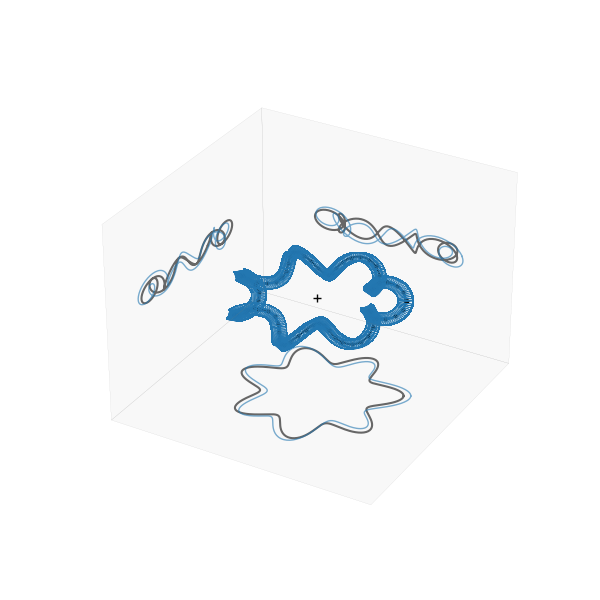

In [9]:
fig, ax = tube.plot_3d()

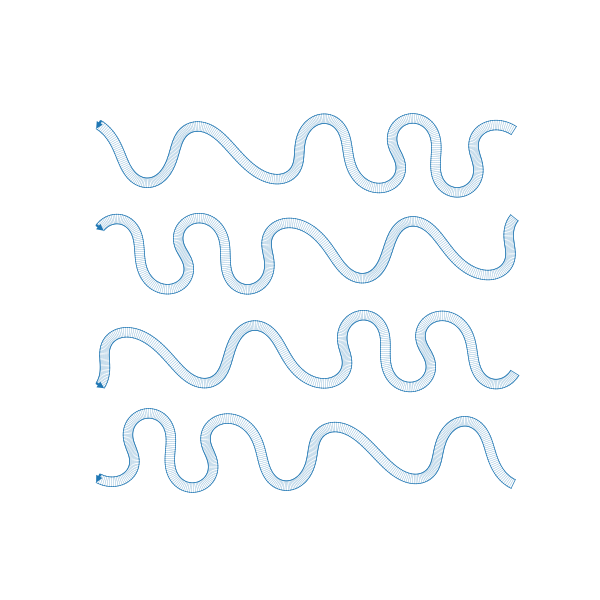

In [10]:
fig, ax = tube.plot_unrolled_strips()

In [11]:
# Save initial state
opt_prob = CTubeOptimizationProblem(tube, opt_weights={}, objective_args={})
opt_prob.save_meshes(paths=paths)
opt_prob.save_optimization_results(paths=paths)  # initial state

## #2: Original 7-fold Unknot from [Maekawa and Scholz 2024] – Ratio 0.200

In [12]:
# Define a path to output specific to the current test case
paths = setup_paths(get_name(), test_name="fig12_7fold_torus_ms_ratio200")

In [13]:
# Directrix: torus knot parametrization from [Maekawa & Scholz 2024]
ratio = 0.200

closed_curve = True
K_per_lobe = 11
n_fold_symm = 7
K = K_per_lobe * n_fold_symm + 1
K_to_M_factor = 6
M = K_to_M_factor * (K - 1) + 1

R = 3
r = ratio * R
ts_disc_curve = torch.linspace(0.0, 2.0 * PI, K)
cps_ref = torus_knot_parameterization_maekawa_scholz(ts_disc_curve, p=1, q=n_fold_symm, r=r, R=R)

In [14]:
# Define symmetry transform
z_axis = torch.tensor([0.0, 0.0, 1.0], dtype=TORCH_DTYPE)
symm_7_fold = [
    lambda pts: rotate_about_axis(pts, z_axis, torch.tensor(2*PI/7)),
    lambda pts: rotate_about_axis(pts, z_axis, torch.tensor(4*PI/7)),
    lambda pts: rotate_about_axis(pts, z_axis, torch.tensor(6*PI/7)),
    lambda pts: rotate_about_axis(pts, z_axis, torch.tensor(8*PI/7)),
    lambda pts: rotate_about_axis(pts, z_axis, torch.tensor(10*PI/7)),
    lambda pts: rotate_about_axis(pts, z_axis, torch.tensor(12*PI/7)),
]
symmetry_transforms = symm_7_fold

# Select only one part of the curve
K = (K - 1) // n_fold_symm + 1
M = (M - 1) // n_fold_symm + 1
cps_ref = cps_ref[:K]

In [15]:
# C-tube
directrix = Directrix(cps_ref, M, symmetry_transforms=symmetry_transforms)

X0 = directrix.X[0]
T0 = directrix.get_tangents()[0]
generatrix = Generatrix(generatrix_2d, X0, T0)

plane_normals = get_bisecting_plane_normals_with_symmetry(directrix)

tube = CTube(
    directrix, generatrix, plane_normals,
    symmetry_transforms=symmetry_transforms
)

In [16]:
# Pickle C-Tube
pkl_file = os.path.join(paths["output_opt"], "tube.pkl")
dill.dump(tube, open(pkl_file, "wb"))

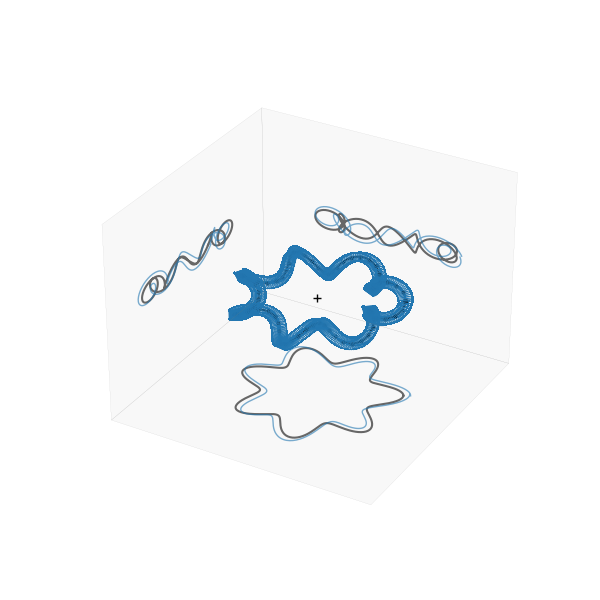

In [17]:
fig, ax = tube.plot_3d()

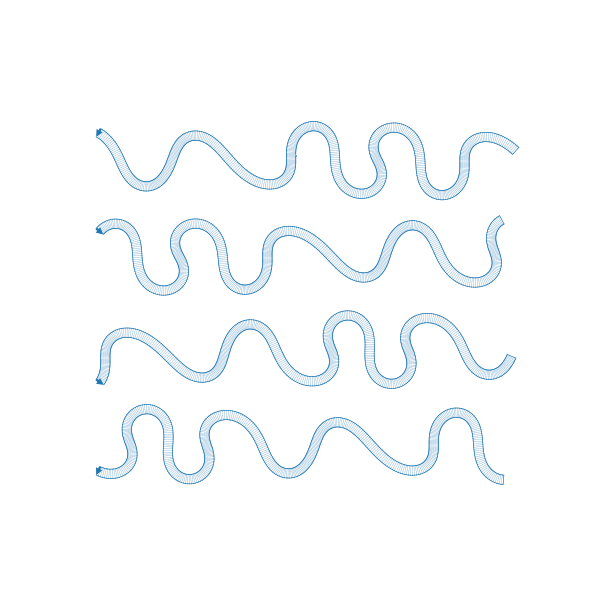

In [18]:
fig, ax = tube.plot_unrolled_strips()

In [19]:
# Save initial state
opt_prob = CTubeOptimizationProblem(tube, opt_weights={}, objective_args={})
opt_prob.save_meshes(paths=paths)
opt_prob.save_optimization_results(paths=paths)  # initial state

## #3: C-Tube 7-fold Unknot – Ratio 0.205

In [29]:
ratio = 0.205
paths_ms = setup_paths(get_name(), test_name="fig12_7fold_torus_ms_ratio{}".format(int(ratio * 1000)))

pkl_file = os.path.join(paths_ms["output_opt"], "tube.pkl")
tube = dill.load(open(pkl_file, "rb"))

In [30]:
# Define a path to output specific to the current test case
paths = setup_paths(get_name(), test_name="fig12_7fold_torus_ours_ratio{}".format(int(ratio * 1000)))

In [31]:
fig, ax = tube.plot_3d()

In [32]:
fig, ax = tube.plot_unrolled_strips()

### Optimization

In [33]:
# Target cross-sections
target_cross_sections = fix_end_cross_sections(tube, get_pairings_all(N))

# As second target cross-section, rotate the first cross-section by the first symmetry transform
first_cs = target_cross_sections.target_points[0, ...]
target_cross_sections.target_points[1, ...] = symmetry_transforms[0](first_cs)

In [ ]:
# Set up optimization problem

opt_weights = {
    'match_target_cross_sections': 1e4 / generatrix.aabb_diagonal_length() ** 2,
    'join_ends': 1.0 / generatrix.aabb_diagonal_length() ** 2,
}

objective_args = {
    'target_cross_sections': target_cross_sections,
    'join_ends_pairings': get_pairings_all(N),
}

opt_prob = CTubeOptimizationProblem(
    tube, 
    opt_weights, 
    objective_args,
)

opt_prob.activate_cps(False)
opt_prob.activate_theta(False)
opt_prob.activate_apex_loc_func(False)
opt_prob.activate_plane_normals(True)

In [36]:
opt_prob.compute_objective(print_to_console=True)

match_target_cross_sections             : 253.1269050311
smooth_plane_normal_diffs               : 0.0000319379
join_ends                               : 0.0000732465
preserve_tube_ridge_edge_directions     : 0.0000000000
unitary_plane_normals                   : 0.0000000000


tensor(253.1270)

In [ ]:
from scipy.optimize import minimize
from Ctubes.opt import obj_and_grad

torch.autograd.set_detect_anomaly(False)

# Set up optimization configuration
opt_prob.configure_optimization_output(paths)

# Get initial parameters
params0 = opt_prob.get_params_numpy()

# Define objective and gradient function for SciPy
obj_and_grad_scipy = lambda params: obj_and_grad(params, opt_prob)

# Fix variables via double-sided bounds
fixed_indices = []  # no fixed DOF by default

bounds = [(None, None)] * len(params0)
for idx in fixed_indices:
    bounds[idx] = (params0[idx], params0[idx])
print(f"Fixing {len(fixed_indices)} parameters.")

# Add initial state to history
opt_prob.add_objective_to_history()

Fixing 0 parameters.


In [38]:
# Run optimization
start_time = time.time()
result = minimize(
    obj_and_grad_scipy, 
    params0, 
    jac=True, 
    method='L-BFGS-B',
    options={'ftol': 1.0e-10, 'gtol': 1.0e-5, 'disp': True, 'maxiter': 2000},
    bounds=bounds,
    callback=opt_prob.optimization_callback,
)
result.execution_time = time.time() - start_time

# Finalize optimization (save results, render videos, cleanup)
opt_prob.finalize_optimization(result)

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          198     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.53127D+02    |proj g|=  4.61298D+01

At iterate    1    f=  4.07091D+01    |proj g|=  1.87939D+01

At iterate    2    f=  4.56975D+00    |proj g|=  7.08880D+00

At iterate    3    f=  4.99248D-01    |proj g|=  2.19874D+00

At iterate    4    f=  2.40000D-02    |proj g|=  7.00348D-01

At iterate    5    f=  4.79501D-03    |proj g|=  1.06327D-01

At iterate    6    f=  3.72636D-03    |proj g|=  9.21926D-02

At iterate    7    f=  2.01137D-03    |proj g|=  4.25130D-02

At iterate    8    f=  9.90736D-04    |proj g|=  1.02441D-01

At iterate    9    f=  6.35780D-04    |proj g|=  7.50677D-02

At iterate   10    f=  4.30623D-04    |proj g|=  1.83650D-02

At iterate   11    f=  3.71165D-04    |proj g|=  3.81694D-02

At iterate   12    f=  2.97714D-04    |proj g|=  5.82121D-03

At iterate   13    f=  2.8

In [40]:
opt_prob.compute_objective(print_to_console=True)

match_target_cross_sections             : 0.0000000025
smooth_plane_normal_diffs               : 0.0000416076
join_ends                               : 0.0000000000
preserve_tube_ridge_edge_directions     : 0.0000000000
unitary_plane_normals                   : 0.0000000284


tensor(4.1638e-05)

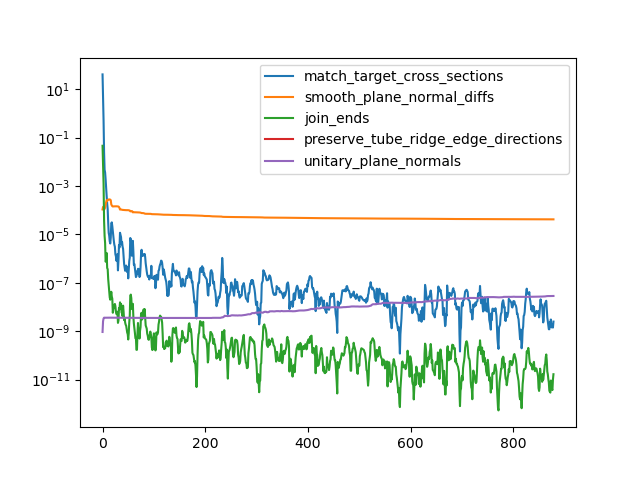

In [41]:
fig, ax = opt_prob.plot_objective_history()

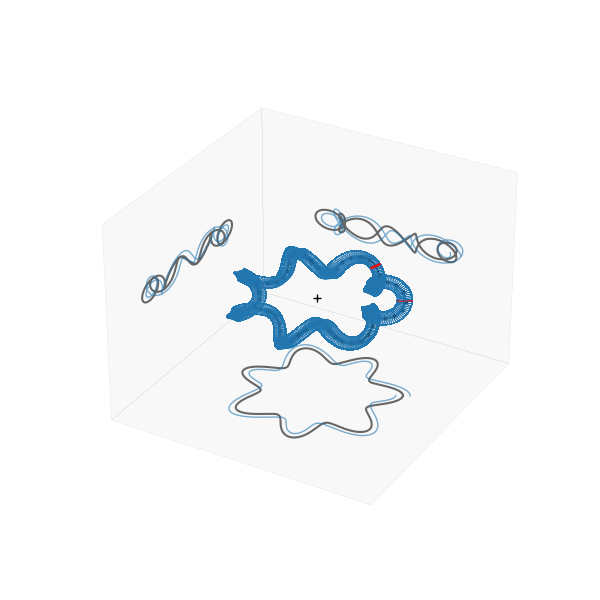

In [42]:
fig, ax = opt_prob.plot_3d()

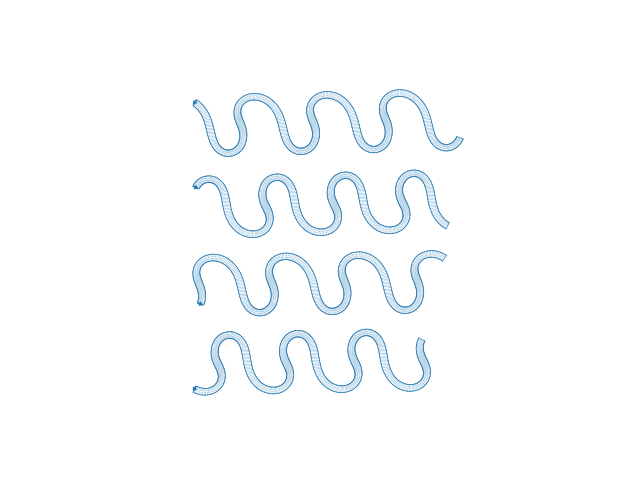

In [43]:
fig, ax = opt_prob.plot_unrolled_strips()

## #4: C-Tube 7-fold Unknot – Ratio 0.200

In [ ]:
ratio = 0.200
paths_ms = setup_paths(get_name(), test_name="fig12_7fold_torus_ms_ratio{}".format(int(ratio * 1000)))

pkl_file = os.path.join(paths_ms["output_opt"], "tube.pkl")
tube = dill.load(open(pkl_file, "rb"))

In [ ]:
# Define a path to output specific to the current test case
paths = setup_paths(get_name(), test_name="fig12_7fold_torus_ours_ratio{}".format(int(ratio * 1000)))

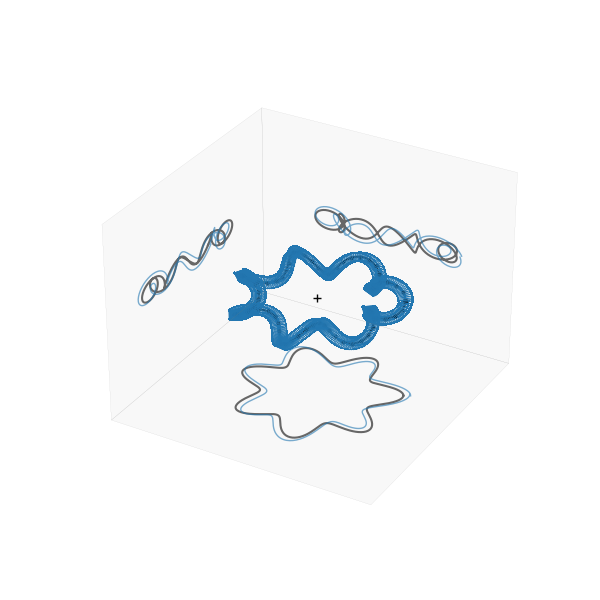

In [85]:
fig, ax = tube.plot_3d()

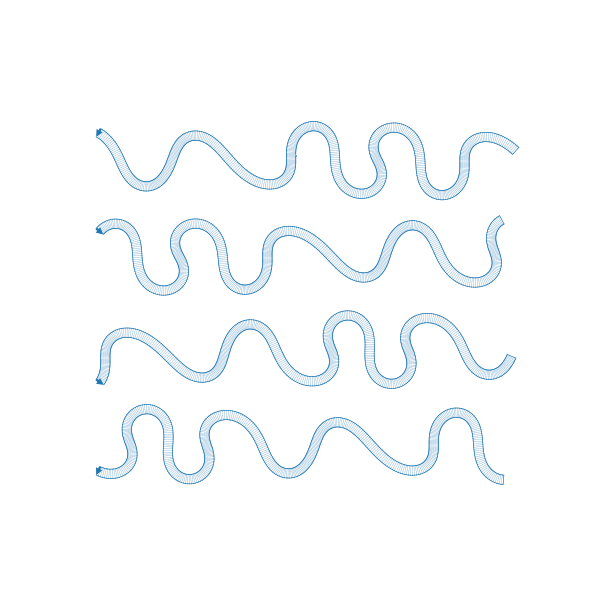

In [86]:
fig, ax = tube.plot_unrolled_strips()

### Optimization

In [ ]:
# Target cross-sections
target_cross_sections = fix_end_cross_sections(tube, get_pairings_all(N))

# As second target cross-section, rotate the first cross-section by the first symmetry transform
first_cs = target_cross_sections.target_points[0, ...]
target_cross_sections.target_points[1, ...] = symmetry_transforms[0](first_cs)

In [ ]:
# Set up optimization problem

opt_weights = {
    'match_target_cross_sections': 1e4 / generatrix.aabb_diagonal_length() ** 2,
    'join_ends': 1.0 / generatrix.aabb_diagonal_length() ** 2,
}

objective_args = {
    'target_cross_sections': target_cross_sections,
    'join_ends_pairings': get_pairings_all(N),
}

opt_prob = CTubeOptimizationProblem(
    tube, 
    opt_weights, 
    objective_args,
)

opt_prob.activate_cps(False)
opt_prob.activate_theta(False)
opt_prob.activate_apex_loc_func(False)
opt_prob.activate_plane_normals(True)

In [94]:
opt_prob.compute_objective(print_to_console=True)

preserve_curve                          : 0.0000000000
match_target_cross_sections             : 258.4597045347
smooth_plane_normal_diffs               : 0.0030465406
join_ends                               : 0.0127305459
preserve_tube_ridge_edge_directions     : 0.0000000000
unitary_plane_normals                   : 0.0000000000


tensor(258.4755)

In [ ]:
from scipy.optimize import minimize
from Ctubes.opt import obj_and_grad

torch.autograd.set_detect_anomaly(False)

# Set up optimization configuration
opt_prob.configure_optimization_output(paths)

# Get initial parameters
params0 = opt_prob.get_params_numpy()

# Define objective and gradient function for SciPy
obj_and_grad_scipy = lambda params: obj_and_grad(params, opt_prob)

# Fix variables via double-sided bounds
fixed_indices = []  # no fixed DOF by default

bounds = [(None, None)] * len(params0)
for idx in fixed_indices:
    bounds[idx] = (params0[idx], params0[idx])
print(f"Fixing {len(fixed_indices)} parameters.")

# Add initial state to history
opt_prob.add_objective_to_history()

Fixing 0 parameters.


In [97]:
# Run optimization
start_time = time.time()
result = minimize(
    obj_and_grad_scipy, 
    params0, 
    jac=True, 
    method='L-BFGS-B',
    options={'ftol': 1.0e-10, 'gtol': 1.0e-5, 'disp': True, 'maxiter': 2000},
    bounds=bounds,
    callback=opt_prob.optimization_callback,
)
result.execution_time = time.time() - start_time

# Finalize optimization (save results, render videos, cleanup)
opt_prob.finalize_optimization(result)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          198     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.58475D+02    |proj g|=  4.12685D+01

At iterate    1    f=  5.38919D+01    |proj g|=  1.78119D+01


 This problem is unconstrained.



At iterate    2    f=  5.37053D+00    |proj g|=  6.63531D+00

At iterate    3    f=  8.08272D-01    |proj g|=  2.54732D+00

At iterate    4    f=  4.69880D-02    |proj g|=  7.46678D-01

At iterate    5    f=  1.49709D-02    |proj g|=  1.33878D-01

At iterate    6    f=  1.39431D-02    |proj g|=  1.09866D-01

At iterate    7    f=  1.11247D-02    |proj g|=  5.59000D-02

At iterate    8    f=  1.05700D-02    |proj g|=  3.94816D-02

At iterate    9    f=  8.99278D-03    |proj g|=  1.17103D-01

At iterate   10    f=  8.63742D-03    |proj g|=  8.47330D-02

At iterate   11    f=  8.04152D-03    |proj g|=  5.73477D-02

At iterate   12    f=  7.14004D-03    |proj g|=  3.33848D-02

At iterate   13    f=  6.75644D-03    |proj g|=  1.82912D-02

At iterate   14    f=  6.44207D-03    |proj g|=  1.90516D-02

At iterate   15    f=  6.15300D-03    |proj g|=  4.32505D-02

At iterate   16    f=  5.98494D-03    |proj g|=  2.24013D-02

At iterate   17    f=  5.88233D-03    |proj g|=  1.65810D-02

At iter

In [98]:
opt_prob.compute_objective(print_to_console=True)

preserve_curve                          : 0.0000000000
match_target_cross_sections             : 0.0000019344
smooth_plane_normal_diffs               : 0.0039891866
join_ends                               : 0.0000000011
preserve_tube_ridge_edge_directions     : 0.0000000000
unitary_plane_normals                   : 0.0000000063


tensor(0.0040)

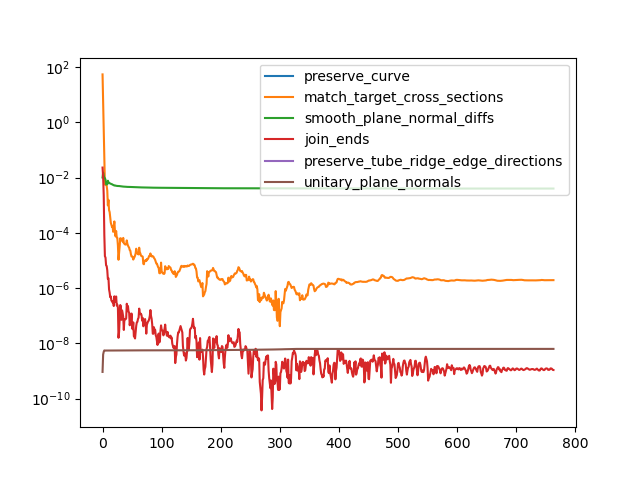

In [92]:
fig, ax = opt_prob.plot_objective_history()

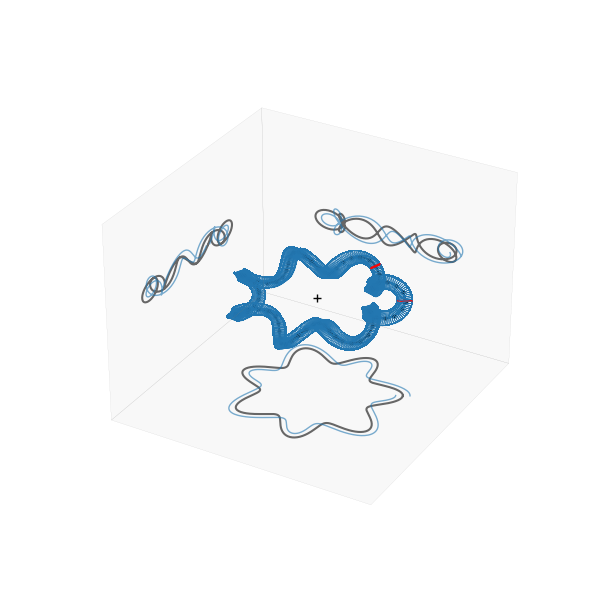

In [93]:
fig, ax = opt_prob.plot_3d()

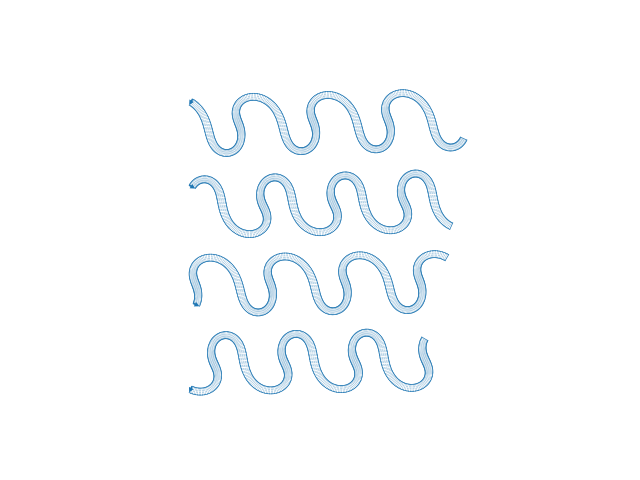

In [94]:
fig, ax = opt_prob.plot_unrolled_strips()